In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tsallis_stats.tsallis import q_gaussian, q_log, q_exp
from scipy.stats import skew, kurtosis


%matplotlib inline
%reload_ext autoreload

In [2]:
#q, beta = 0, 1
#q, beta = 1, 1
#q, beta = 2, 1
#q, beta = 2, 3
params = [(0, 1),(1, 1),(2, 1),(2, 3)]

x = np.linspace(-4,4,100)

In [3]:
q, beta = 0, 1
q_exp(-beta*x**2, q)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.13641465, 0.28007346,
       0.41067238, 0.52821141, 0.63269054, 0.72410978, 0.80246914,
       0.8677686 , 0.92000816, 0.95918784, 0.98530762, 0.99836751,
       0.99836751, 0.98530762, 0.95918784, 0.92000816, 0.8677686 ,
       0.80246914, 0.72410978, 0.63269054, 0.52821141, 0.41067238,
       0.28007346, 0.13641465, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [4]:
q = 1.2
sample_exp = q_exp(x, q)
sample_exp

array([5.29221494e-02, 5.53633647e-02, 5.79409657e-02, 6.06639252e-02,
       6.35418969e-02, 6.65852745e-02, 6.98052556e-02, 7.32139127e-02,
       7.68242708e-02, 8.06503926e-02, 8.47074725e-02, 8.90119404e-02,
       9.35815753e-02, 9.84356317e-02, 1.03594979e-01, 1.09082254e-01,
       1.14922034e-01, 1.21141023e-01, 1.27768262e-01, 1.34835361e-01,
       1.42376761e-01, 1.50430018e-01, 1.59036125e-01, 1.68239871e-01,
       1.78090239e-01, 1.88640856e-01, 1.99950492e-01, 2.12083621e-01,
       2.25111056e-01, 2.39110651e-01, 2.54168106e-01, 2.70377862e-01,
       2.87844124e-01, 3.06682003e-01, 3.27018822e-01, 3.48995593e-01,
       3.72768696e-01, 3.98511782e-01, 4.26417960e-01, 4.56702276e-01,
       4.89604559e-01, 5.25392683e-01, 5.64366308e-01, 6.06861188e-01,
       6.53254137e-01, 7.03968764e-01, 7.59482114e-01, 8.20332371e-01,
       8.87127818e-01, 9.60557277e-01, 1.04140230e+00, 1.13055147e+00,
       1.22901716e+00, 1.33795526e+00, 1.45868853e+00, 1.59273413e+00,
      

In [5]:
sample_log  = q_log(sample_exp, q)
sample_log

array([-4.        , -3.91919192, -3.83838384, -3.75757576, -3.67676768,
       -3.5959596 , -3.51515152, -3.43434343, -3.35353535, -3.27272727,
       -3.19191919, -3.11111111, -3.03030303, -2.94949495, -2.86868687,
       -2.78787879, -2.70707071, -2.62626263, -2.54545455, -2.46464646,
       -2.38383838, -2.3030303 , -2.22222222, -2.14141414, -2.06060606,
       -1.97979798, -1.8989899 , -1.81818182, -1.73737374, -1.65656566,
       -1.57575758, -1.49494949, -1.41414141, -1.33333333, -1.25252525,
       -1.17171717, -1.09090909, -1.01010101, -0.92929293, -0.84848485,
       -0.76767677, -0.68686869, -0.60606061, -0.52525253, -0.44444444,
       -0.36363636, -0.28282828, -0.2020202 , -0.12121212, -0.04040404,
        0.04040404,  0.12121212,  0.2020202 ,  0.28282828,  0.36363636,
        0.44444444,  0.52525253,  0.60606061,  0.68686869,  0.76767677,
        0.84848485,  0.92929293,  1.01010101,  1.09090909,  1.17171717,
        1.25252525,  1.33333333,  1.41414141,  1.49494949,  1.57

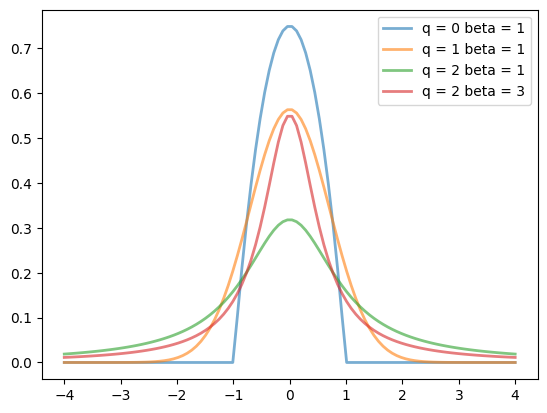

In [5]:
fig, ax = plt.subplots()
for p in params:
    ax.plot(x, q_gaussian.pdf(x, p[0], p[1]), lw=2, alpha=0.6, label=f'q = {p[0]} beta = {p[1]}')
ax.legend()
plt.show()

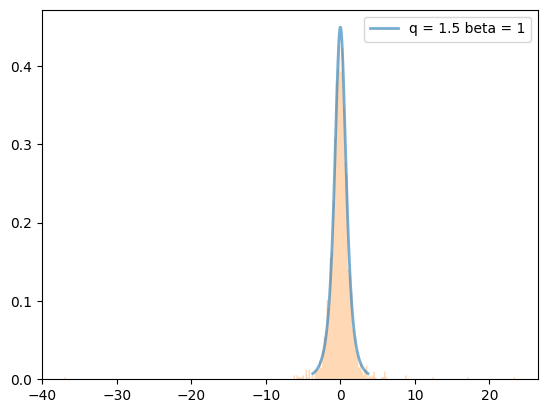

In [6]:
q, beta = 1.5, 1
x = np.linspace(q_gaussian.ppf(0.01, q, beta), q_gaussian.ppf(0.99, q, beta), 100)
r = q_gaussian.rvs(q, beta, size=2000)
fig, ax = plt.subplots()
ax.plot(x, q_gaussian.pdf(x, q, beta), lw=2, alpha=0.6, label=f'q = {q} beta = {beta}')
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.3)
ax.legend()
plt.show()


In [24]:
mean, var, skew, kurt = q_gaussian.stats(q, beta, moments='mvsk')
rvs = q_gaussian.rvs(q, beta, size=10000)
np.mean(rvs), np.var(rvs), kurtosis(rvs)

(-0.011053887213977385, 0.7102773567518541, 1.2839519194691187)

In [20]:
rvs.mean(), rvs.var(), kurtosis(rvs)

(-0.009161803548856984, 0.7357711393121524, 1.3244587236305696)

In [23]:
mean, var, skew, kurt

(0.0, 0.7142857142857141, 0.0, 1.1999999999999997)

In [3]:
q_gaussian.ppf(0.01, q, beta)

-1.3004968628573081

In [4]:
q_gaussian.ppf(0.99, q, beta)

0.2527781512569808

In [39]:
vals = q_gaussian.ppf([0.001, 0.5, 0.999], q, beta)
np.allclose([0.001, 0.5, 0.999], q_gaussian.cdf(vals, q, beta))

True